# 毕业设计：基于标题检索和语料库分析的《明镜》周刊（1947-2020）涉华报道研究 —— 数据预处理和可视化

## 导入所有需要用到的模块

In [111]:
from wordcloud import WordCloud
from spacy.lang.de.stop_words import STOP_WORDS
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import spacy

## 导入数据

In [2]:
f = pd.read_csv('data.csv')

In [3]:
f.head()

Index         Id Erscheinungsdatum                         Überschrift  \
0      1  174544063        19.12.2020           Man gönnt sich wieder was   
1      2  174419239        12.12.2020                        Betr.: China   
2      3  174419284        12.12.2020             »Viel Erfolg weiterhin«   
3      4  174316816        05.12.2020             Neuer Kinoboom in Asien   
4      5  174316771        05.12.2020  »Es muss ein Signal an Iran geben«   

                                            Vorspann                Channel  \
0  Krise? Welche Krise? Im Luxussegment laufen di...             Wirtschaft   
1  Seit acht Jahren führt Xi Jinping die KP China...         Hausmitteilung   
2  Vertrauliche Dokumente belegen, dass sich die ...             Wirtschaft   
3  Blockbuster in China und Japan machen auch Hol...         Meldung Kultur   
4  Außenminister Heiko Maas (SPD) wird das Verhäl...  Interview Deutschland   

   Seite   Epaperkey     Score  \
0     82  SP-2020-52  5.286109   
1      5  SP-2020-51  6.630771   
2     64  SP-2020-51  5.560302   
3    118  SP-2020-50  6.585002   
4     30  SP-2020-50  4.705953   

                                                Text  
0  Der Handel leidet, doch der Luxus boomt — DER ...  
1  — DER SPIEGEL 2020/51HausmitteilungTitelChinaS...  
2  Wie die Bundesregierung den Konzern bei der Ch...  
3  — DER SPIEGEL 2020/50KulturFilmgeschäftLyrikSa...  
4  Außenminister Maas fordert ein Nuklearabkommen...

## 对数据进行处理

In [4]:
nlp = spacy.load('de_core_news_sm')

In [6]:
f['text_words'] = ''

In [7]:
f.head()

Index         Id Erscheinungsdatum                         Überschrift  \
0      1  174544063        19.12.2020           Man gönnt sich wieder was   
1      2  174419239        12.12.2020                        Betr.: China   
2      3  174419284        12.12.2020             »Viel Erfolg weiterhin«   
3      4  174316816        05.12.2020             Neuer Kinoboom in Asien   
4      5  174316771        05.12.2020  »Es muss ein Signal an Iran geben«   

                                            Vorspann                Channel  \
0  Krise? Welche Krise? Im Luxussegment laufen di...             Wirtschaft   
1  Seit acht Jahren führt Xi Jinping die KP China...         Hausmitteilung   
2  Vertrauliche Dokumente belegen, dass sich die ...             Wirtschaft   
3  Blockbuster in China und Japan machen auch Hol...         Meldung Kultur   
4  Außenminister Heiko Maas (SPD) wird das Verhäl...  Interview Deutschland   

   Seite   Epaperkey     Score  \
0     82  SP-2020-52  5.286109   
1      5  SP-2020-51  6.630771   
2     64  SP-2020-51  5.560302   
3    118  SP-2020-50  6.585002   
4     30  SP-2020-50  4.705953   

                                                Text text_words  
0  Der Handel leidet, doch der Luxus boomt — DER ...             
1  — DER SPIEGEL 2020/51HausmitteilungTitelChinaS...             
2  Wie die Bundesregierung den Konzern bei der Ch...             
3  — DER SPIEGEL 2020/50KulturFilmgeschäftLyrikSa...             
4  Außenminister Maas fordert ein Nuklearabkommen...

In [112]:
print(STOP_WORDS)

{'diesem', 'muß', 'je', 'sollen', 'dahinter', 'ebenso', 'siebte', 'meine', 'jeden', 'mögen', 'derjenigen', 'während', 'daselbst', 'welche', 'übrigens', 'rechter', 'elf', 'neue', 'gewesen', 'gegen', 'anderen', 'sei', 'vergangene', 'um', 'neunte', 'warum', 'können', 'groß', 'tat', 'dessen', 'damit', 'wollen', 'gekannt', 'sechs', 'erst', 'später', 'á', 'einige', 'demselben', 'diejenigen', 'wurde', 'erster', 'wir', 'achten', 'welches', 'deinem', 'ganze', 'bist', 'großes', 'denen', 'daher', 'rechtes', 'werdet', 'ins', 'du', 'gross', 'hin', 'kaum', 'vor', 'welchem', 'gute', 'siebenten', 'heißt', 'wenige', 'unserer', 'solang', 'in', 'doch', 'darunter', 'zurück', 'fünfte', 'neun', 'bereits', 'wen', 'richtig', 'mussten', 'keiner', 'ehrlich', 'will', 'die', 'werden', 'dementsprechend', 'manches', 'eigen', 'gehabt', 'einander', 'könnte', 'vierten', 'dermassen', 'ach', 'hinter', 'wahr', 'einem', 'ersten', 'sieben', 'gemacht', 'acht', 'ab', 'nein', 'weniges', 'hatten', 'her', 'aus', 'en', 'sie', 's

In [12]:
for i in tqdm(range(len(f['Text']))):
    f['text_words'].loc[i] = nlp(f['Text'].loc[i])

  0%|                                                                                         | 0/1025 [00:00<?, ?it/s]D:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████████████████████████████████████████████████████████████████████████| 1025/1025 [03:39<00:00,  4.67it/s]


In [16]:
for token in f['text_words'].loc[1]:
    print(token, token.lemma_, token.lemma)
    print(token, token.pos_, token.pos)

— — 13657828488461764581
— PUNCT 97
DER DER 4715202015532641027
DER DET 90
SPIEGEL SPIEGEL 6777732414539982015
SPIEGEL PROPN 96
2020 2020 12787237664664642308
2020 NUM 93
/ / 2466615745961202537
/ PUNCT 97
51HausmitteilungTitelChinaSommermärchenHumboldt 51HausmitteilungTitelChinaSommermärchenHumboldt 15367964895425355301
51HausmitteilungTitelChinaSommermärchenHumboldt PROPN 96
Forum Forum 281413827863334798
Forum NOUN 92
Feldenkirchen Feldenkirchen 15515970599878434320
Feldenkirchen NOUN 92
, , 2593208677638477497
, PUNCT 97
GroekathferEs GroekathferEs 11917933132611925264
GroekathferEs PROPN 96
war sein 5817815807927905559
war AUX 87
die der 9250722957692387333
die DET 90
wohl wohl 18349326713224006035
wohl ADV 86
grte grte 5205100866849543068
grte ADJ 84
politische politische 3765726213661886928
politische ADJ 84
Fehleinschtzung Fehleinschtzung 1407877774430130449
Fehleinschtzung NOUN 92
dieses dies 15931089041693217225
dieses DET 90
Jahres Jahr 9196849747647114023
Jahres NOUN 92
: :

Autor NOUN 92
Nils Nils 4316906351915555954
Nils PROPN 96
Minkmar Minkmar 15316909225068872528
Minkmar PROPN 96
durften dürfen 2640181473065029716
durften AUX 87
nicht nicht 14913735501962191409
nicht PART 94
nur nur 9060718883982528417
nur ADV 86
das der 9250722957692387333
das DET 90
neue neue 745742236295836035
neue ADJ 84
Schloss Schloss 5151488057597110991
Schloss NOUN 92
besichtigen besichtigen 18348528512363711950
besichtigen VERB 100
, , 2593208677638477497
, PUNCT 97
sondern sondern 2677817248526573127
sondern CCONJ 89
auch auch 130540849680294293
auch ADV 86
die der 9250722957692387333
die DET 90
sogenannte sogenannt 9434151271442894736
sogenannte ADJ 84
Restaurierungsstrae Restaurierungsstrae 13057126998324689019
Restaurierungsstrae PROPN 96
fr fr 12065517566335200145
fr PROPN 96
ethnologische ethnologische 8985068333714746382
ethnologische ADJ 84
Objekte Objekt 14298534482069855122
Objekte NOUN 92
in in 3002984154512732771
in ADP 85
Berlin-Dahlem Berlin-Dahlem 4397702452751

In [31]:
f['Channel'].value_counts().index[0:10]

Index(['Ausland', 'Wirtschaft', 'Deutschland', 'Kultur', 'Trends Wirtschaft',
       'Hausmitteilung', 'Panorama', 'Wissenschaft+Technik',
       'Panorama Ausland', 'Titelgeschichte Ausland'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 Kategorien')

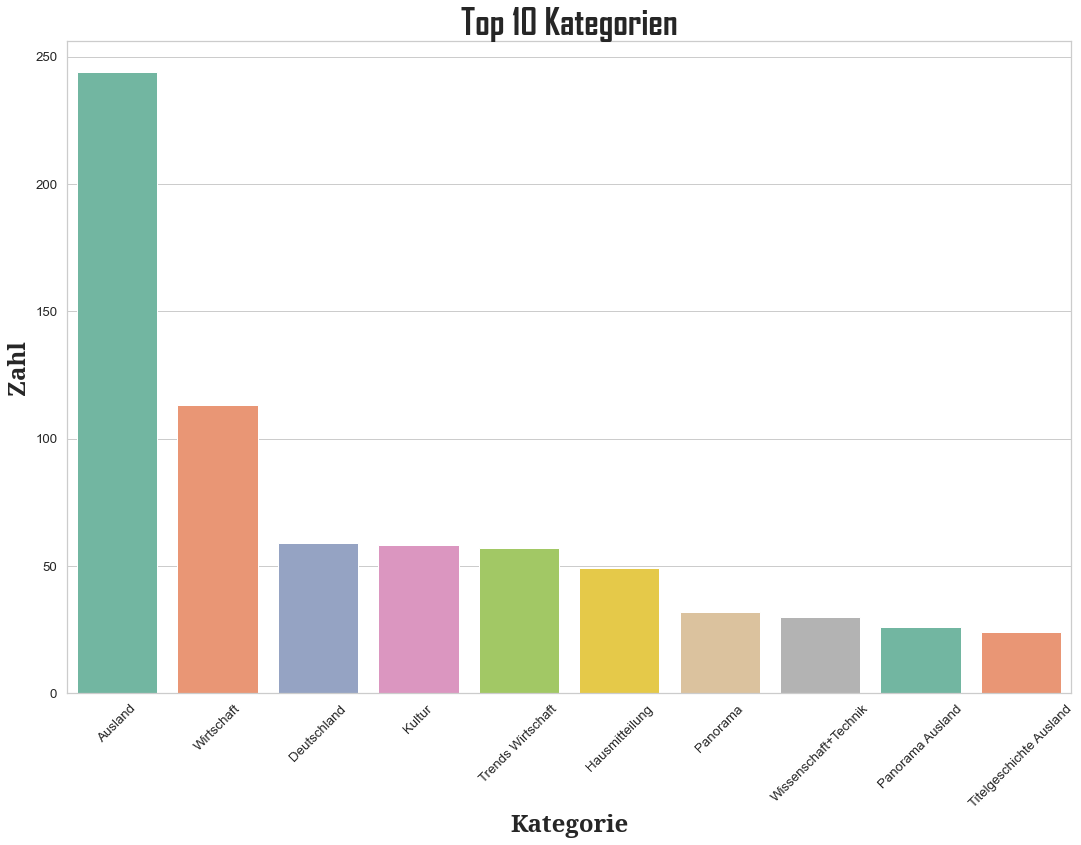

In [91]:
plt.figure(figsize = (18,12))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "Channel" , data = f, order = list(f['Channel'].value_counts().index[0:10]), palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_ylabel("Zahl", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_xlabel("Kategorie", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_title("Top 10 Kategorien", fontsize = 36, fontweight = 'bold',fontfamily = 'Agency FB')

In [93]:
f['title_words'] = ''
f['abstract_words'] = ''

In [94]:
f.head()

Index         Id Erscheinungsdatum                         Überschrift  \
0      1  174544063        19.12.2020           Man gönnt sich wieder was   
1      2  174419239        12.12.2020                        Betr.: China   
2      3  174419284        12.12.2020             »Viel Erfolg weiterhin«   
3      4  174316816        05.12.2020             Neuer Kinoboom in Asien   
4      5  174316771        05.12.2020  »Es muss ein Signal an Iran geben«   

                                            Vorspann                Channel  \
0  Krise? Welche Krise? Im Luxussegment laufen di...             Wirtschaft   
1  Seit acht Jahren führt Xi Jinping die KP China...         Hausmitteilung   
2  Vertrauliche Dokumente belegen, dass sich die ...             Wirtschaft   
3  Blockbuster in China und Japan machen auch Hol...         Meldung Kultur   
4  Außenminister Heiko Maas (SPD) wird das Verhäl...  Interview Deutschland   

   Seite   Epaperkey     Score  \
0     82  SP-2020-52  5.286109   
1      5  SP-2020-51  6.630771   
2     64  SP-2020-51  5.560302   
3    118  SP-2020-50  6.585002   
4     30  SP-2020-50  4.705953   

                                                Text  \
0  Der Handel leidet, doch der Luxus boomt — DER ...   
1  — DER SPIEGEL 2020/51HausmitteilungTitelChinaS...   
2  Wie die Bundesregierung den Konzern bei der Ch...   
3  — DER SPIEGEL 2020/50KulturFilmgeschäftLyrikSa...   
4  Außenminister Maas fordert ein Nuklearabkommen...   

                                          text_words title_words  \
0  (Der, Handel, leidet, ,, doch, der, Luxus, boo...               
1  (—, DER, SPIEGEL, 2020, /, 51HausmitteilungTit...               
2  (Wie, die, Bundesregierung, den, Konzern, bei,...               
3  (—, DER, SPIEGEL, 2020, /, 50KulturFilmgeschäf...               
4  (Außenminister, Maas, fordert, ein, Nuklearabk...               

  abstract_words  
0                 
1                 
2                 
3                 
4

In [182]:
for i in tqdm(range(len(f['Vorspann']))):
    f['title_words'].loc[i] = nlp(f['Überschrift'].loc[i])
    try:
        f['abstract_words'].loc[i] = nlp(f['Vorspann'].loc[i])
    except:
        f['abstract_words'].loc[i] = nlp('Kein Vorspann')

  0%|                                                                                         | 0/1025 [00:00<?, ?it/s]D:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████████████████████████████████████████████████████████████████████████| 1025/1025 [06:24<00:00,  2.66it/s]


In [183]:
title_nouns = list()
abstract_nouns = list()
text_nouns = list()

In [184]:
for i in tqdm(f['title_words']):
    for chunk in i:
        if (chunk.pos_ == 'PROPN' or chunk.pos_ == 'NOUN') and chunk.is_stop is False:
            title_nouns.append(chunk.text)
print(title_nouns)

100%|██████████████████████████████████████████████████████████████████████████| 1025/1025 [00:00<00:00, 256973.20it/s]

['Betr.', 'China', 'Erfolg', 'Kinoboom', 'Asien', 'Signal', 'Iran', 'Aufrüsten', 'China', 'Menschheitsprojekt', 'Kampf', 'Teilung', 'Welt', 'Brutal', 'Pest', 'Weltmarkt', 'Guttenberg', 'China', 'Sputnik-Moment', 'Spiel', 'Bombe', 'Sanktionen', 'Hacker', 'Herkules', 'Goliath', 'Euro', 'Oma', 'China', 'China', 'Weltkrieg', 'Labor', 'Fronten', 'Experiments', 'Singen', 'Schuldfrage', 'Ungeschützt', 'Hilfe', 'Folterwerkzeuge', 'Anatomie', 'Killers', 'Chance', 'China', 'Unsicherheit', 'Normalität', 'Umweg', 'China', 'Dünner', 'Mantel', 'Krieg', 'Keim', 'Angst', 'Ratte', 'Wimpel', 'Trump', 'Trump', 'Hitler', 'Charisma', 'Schaut', 'Xinjiang', 'Nato', 'Operation', 'Säbel', 'Taiwan', 'China', 'Sterne', 'Bauernopfer', 'China', 'Lukaschenko', 'Anschluss', 'China', 'Währung', 'Waffe', 'Betr.', 'China', 'Wasser', 'Propheten', 'Partei', 'Billionen-Bombe', 'Stühlen', 'Vorhang', 'Herr', 'Forones', 'China', 'Vertrauen', 'China', 'USA', 'Tropf', 'Aufstieg', 'Widersprüche', 'Frage', 'Kontrolle', 'Betr.', 

In [185]:
for i in tqdm(f['abstract_words']):
    for chunk in i:
        if (chunk.pos_ == 'PROPN' or chunk.pos_ == 'NOUN') and chunk.is_stop is False:
            abstract_nouns.append(str(chunk.lemma_))

100%|███████████████████████████████████████████████████████████████████████████| 1025/1025 [00:00<00:00, 42822.47it/s]


In [204]:
text_nouns = list()
for i in tqdm(f['text_words']):
    for chunk in i:
        if (chunk.pos_ == 'PROPN' or chunk.pos_ == 'NOUN') and chunk.is_stop is False and ('SPIEGEL' not in chunk.text) and ('Spiegel' not in chunk.text) and ('Gutschein' not in chunk.text)and len(chunk.text) < 20:
            text_nouns.append(str(chunk.lemma_))

100%|████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:00<00:00, 1351.93it/s]


(-0.5, 2999.5, 1999.5, -0.5)

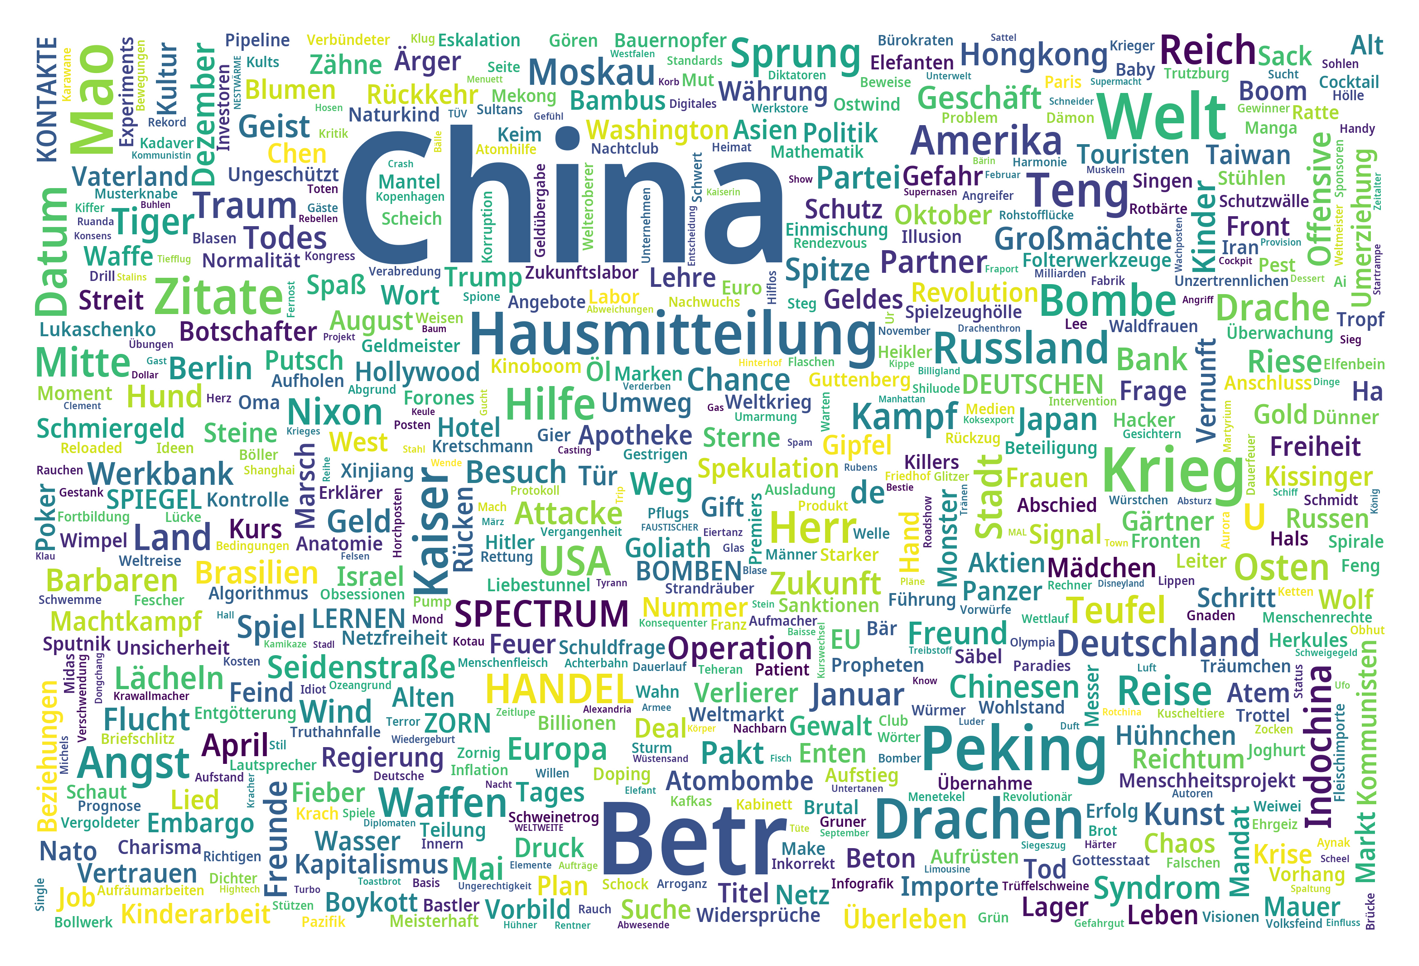

In [187]:
all_words = ' '.join(title_nouns)
wc = WordCloud(font_path='C:/Windows/Fonts/NotoSans-SemiCondensedSemiBold.ttf',
               background_color="white",  # 背景颜色
               max_words=10000,  # 词云显示的最大词数
               max_font_size=400,  # 字体最大值
               min_font_size=20, #字体最小值
               random_state=78, #随机数
               collocations=False, #避免重复单词
               width=3000,height=2000,margin=10, #图像宽高，字间距，需要配合下面的plt.figure(dpi=xx)放缩才有效
              )

wc.generate(all_words)
plt.figure(dpi=300) #通过这里可以放大或缩小
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis("off") #隐藏坐标

(-0.5, 2999.5, 1999.5, -0.5)

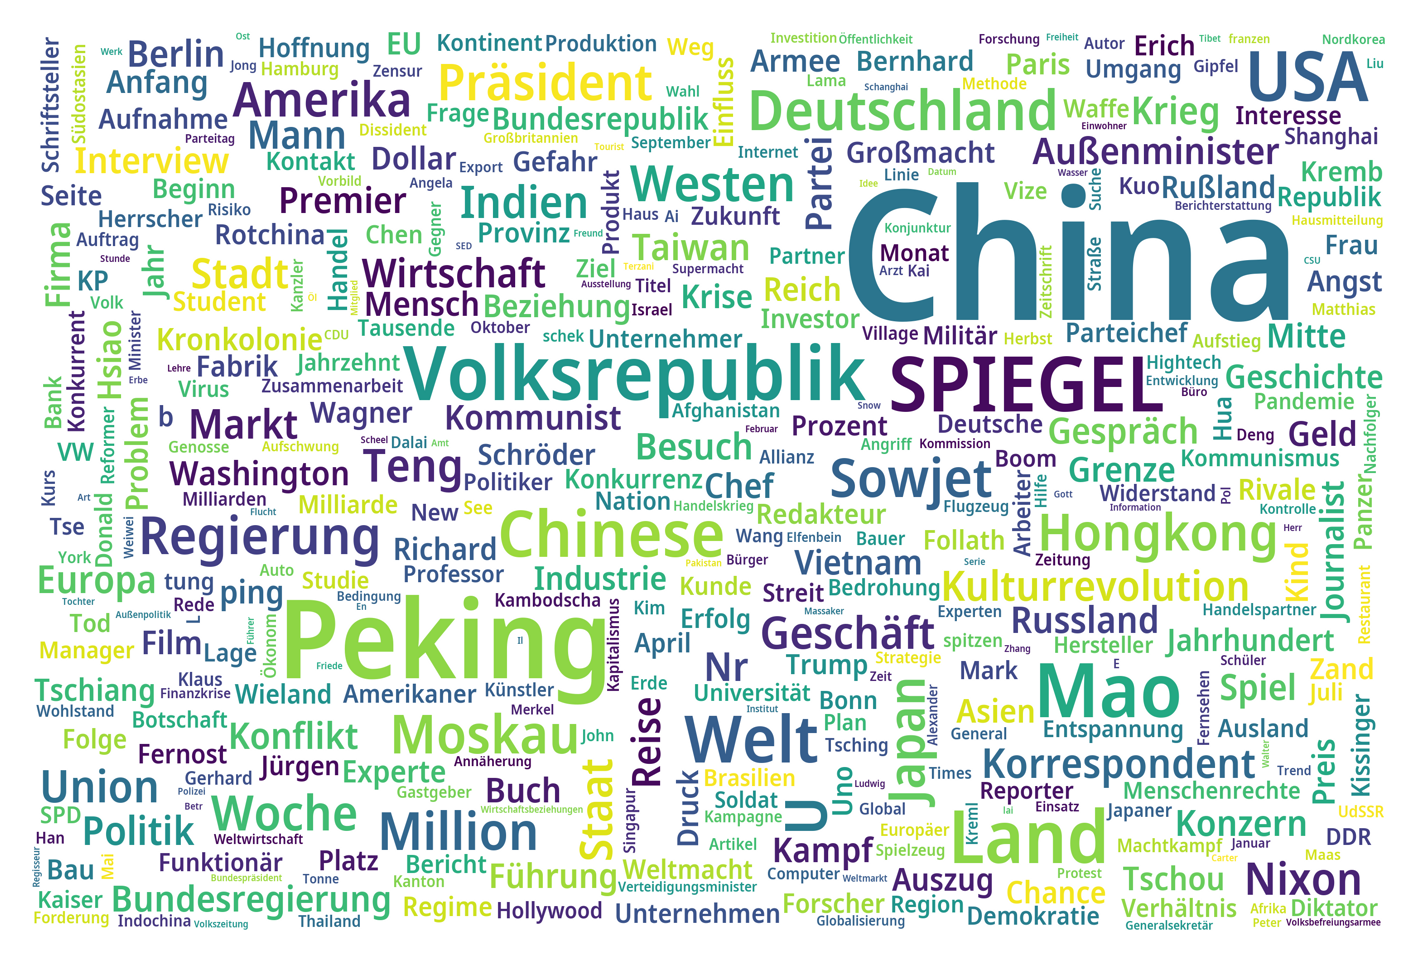

In [188]:
all_words = ' '.join(abstract_nouns)
wc.generate(all_words)
plt.figure(dpi=300) #通过这里可以放大或缩小
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis("off") #隐藏坐标

(-0.5, 2999.5, 1999.5, -0.5)

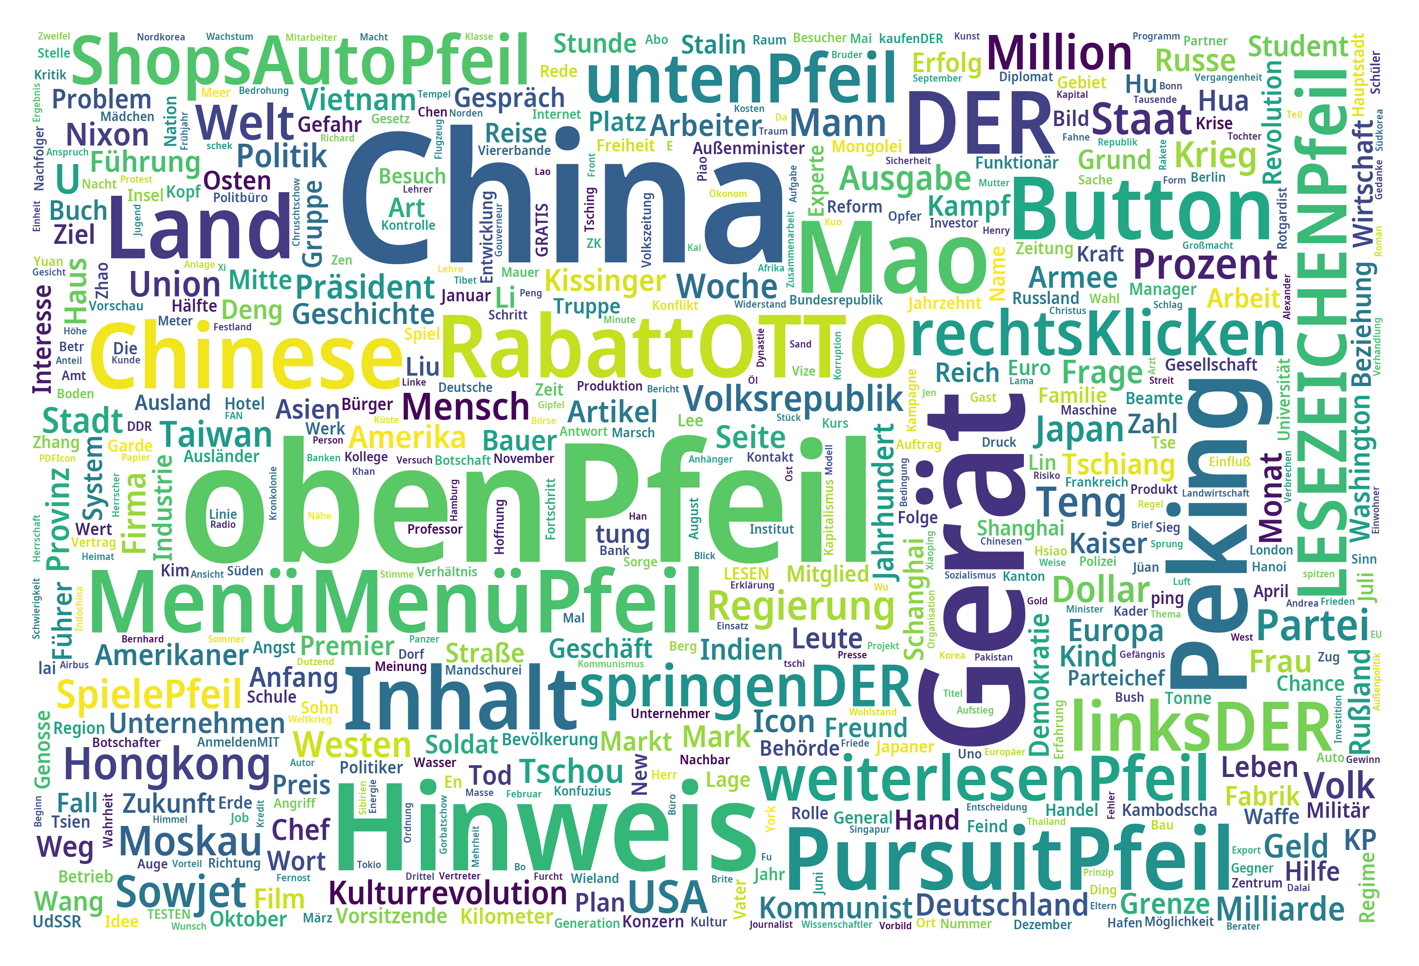

In [205]:
wc = WordCloud(font_path='C:/Windows/Fonts/NotoSans-SemiCondensedSemiBold.ttf',
               background_color="white",  # 背景颜色
               max_words=1000,  # 词云显示的最大词数
               max_font_size=400,  # 字体最大值
               min_font_size=20, #字体最小值
               random_state=78, #随机数
               collocations=False, #避免重复单词
               width=3000,height=2000,margin=10, #图像宽高，字间距，需要配合下面的plt.figure(dpi=xx)放缩才有效
              )
all_words = ' '.join(text_nouns)
wc.generate(all_words)
plt.figure(dpi=300) #通过这里可以放大或缩小
plt.imshow(wc, interpolation='catrom',vmax=1000)
plt.axis("off") #隐藏坐标

In [193]:
text_nouns

['Handel',
 'Luxus',
 'SPIEGEL',
 '52Prada-Werbung',
 'Macau',
 'Kontakt',
 'wasKonsum',
 'Krise',
 'Krise',
 'Luxussegment',
 'Geschäft',
 'China',
 'Deutsche',
 'Bahnhofstrae',
 'Ort',
 'fr',
 'Geldbeutel',
 'Europa',
 'Luxusboutiquen',
 'Rolex',
 'Prada',
 'Burberry',
 'Herms',
 'Marke',
 'fr',
 'Normalverdiener',
 'Zara',
 'M',
 'Benetton',
 'Filiale',
 'Dezembermorgen',
 'Passant',
 'Andrang',
 'Louis',
 'Vuitton',
 'Dutzend',
 'Kunde',
 'Schlange',
 'Temperatur',
 'Gefrierpunkt',
 'Schweiz',
 'Vorschau',
 'Ausgabe',
 'Abo',
 'SPIEGEL-ID',
 'Artikel',
 'AnmeldenMIT',
 'SPIEGEL+',
 'LESEN',
 'GRATIS',
 'TESTEN',
 'Artikel',
 'Ausgabe',
 '2020.',
 'Ausgabe',
 'kaufenDER',
 'SPIEGEL52',
 'Yeung',
 'Bloomberg',
 'Getty',
 'ImagesDaniel',
 'Pilar',
 'SPIEGEL',
 '51HausmitteilungTitelChinaSommermärchenHumboldt',
 'Forum',
 'Feldenkirchen',
 'GroekathferEs',
 'Fehleinschtzung',
 'Jahr',
 'Shutdown',
 'Corona-Welle',
 'November',
 'Versprechen',
 'Shutdown',
 'SPIEGEL-Team',
 'Markus',
 '

In [198]:
'Spiegel' in 'Der Spiegel'

True

In [219]:
title_nouns_df = pd.DataFrame()
title_nouns_df['words'] = title_nouns

Text(0.5, 1.0, 'Top 10 Substantive im Titel')

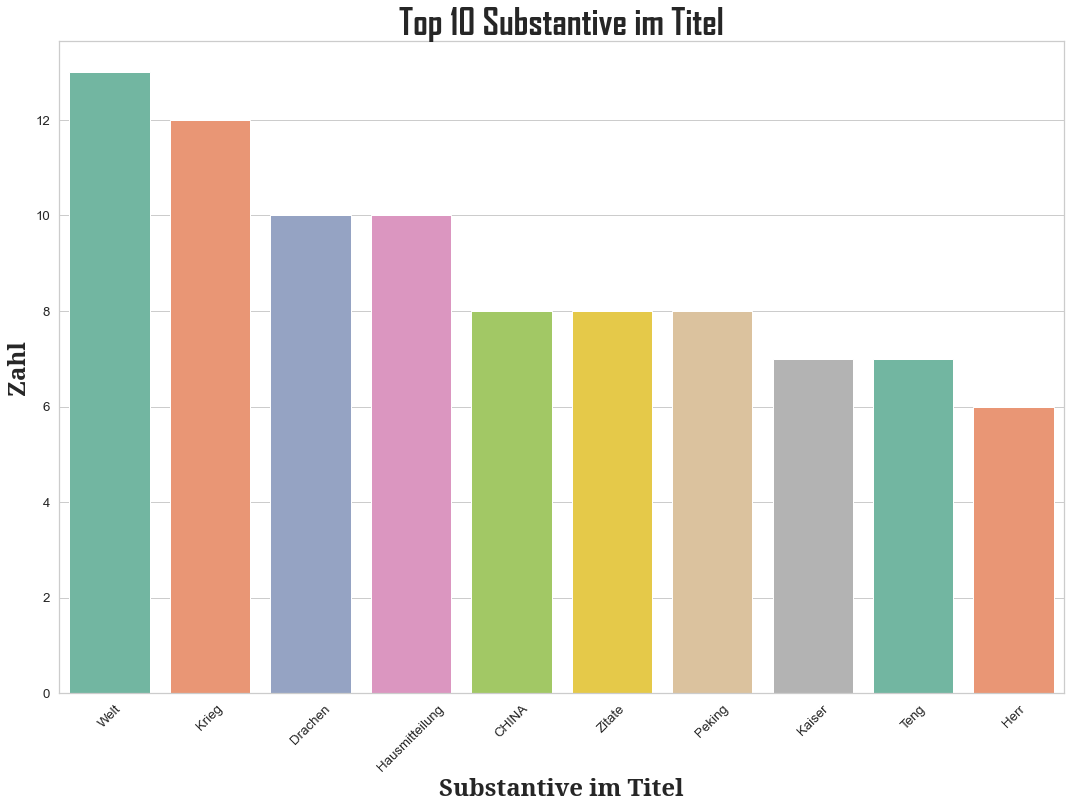

In [220]:
plt.figure(figsize = (18,12))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "words" , data = title_nouns_df, order = list(title_nouns_df['words'].value_counts().index[2:12]), palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_ylabel("Zahl", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_xlabel("Substantive im Titel", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_title("Top 10 Substantive im Titel", fontsize = 36, fontweight = 'bold',fontfamily = 'Agency FB')

Text(0.5, 1.0, 'Top 10 Substantive im Vorspann')

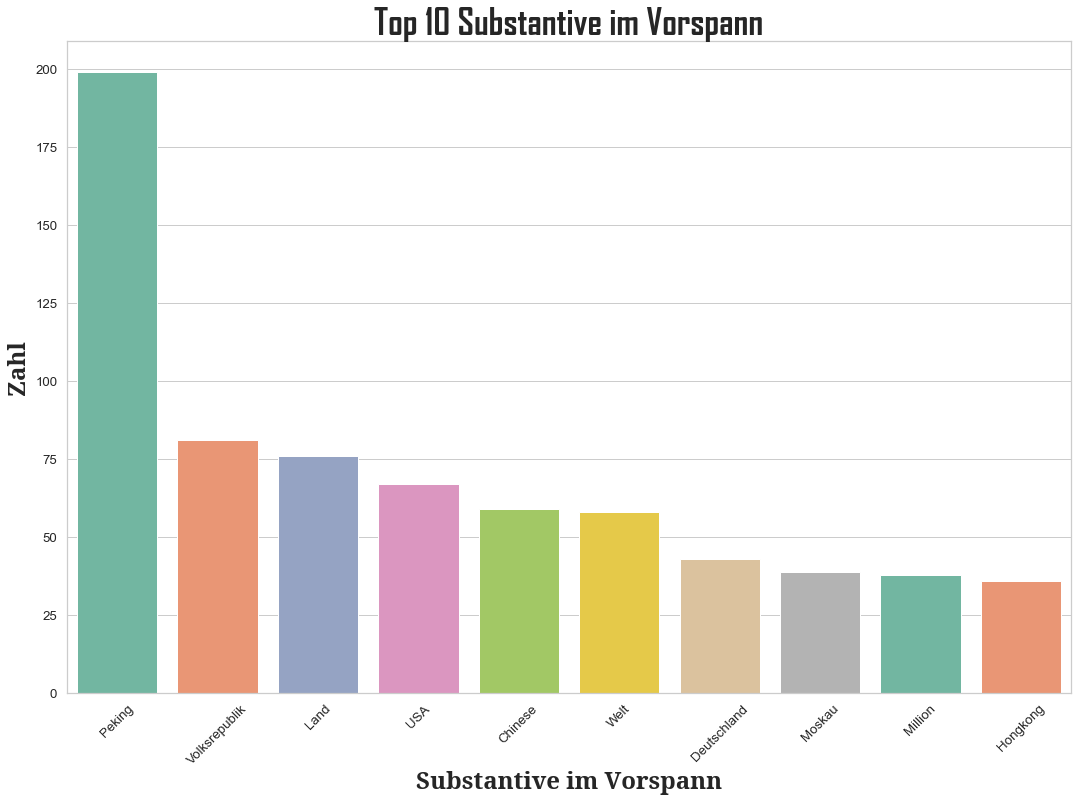

In [218]:
abstract_nouns_df = pd.DataFrame()
abstract_nouns_df['words'] = abstract_nouns

plt.figure(figsize = (18,12))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "words" , data = abstract_nouns_df, order = list(abstract_nouns_df['words'].value_counts().index[1:3]) + list(abstract_nouns_df['words'].value_counts().index[4:12]), palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_ylabel("Zahl", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_xlabel("Substantive im Vorspann", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_title("Top 10 Substantive im Vorspann", fontsize = 36, fontweight = 'bold',fontfamily = 'Agency FB')

Text(0.5, 1.0, 'Top 10 Substantive im Text')

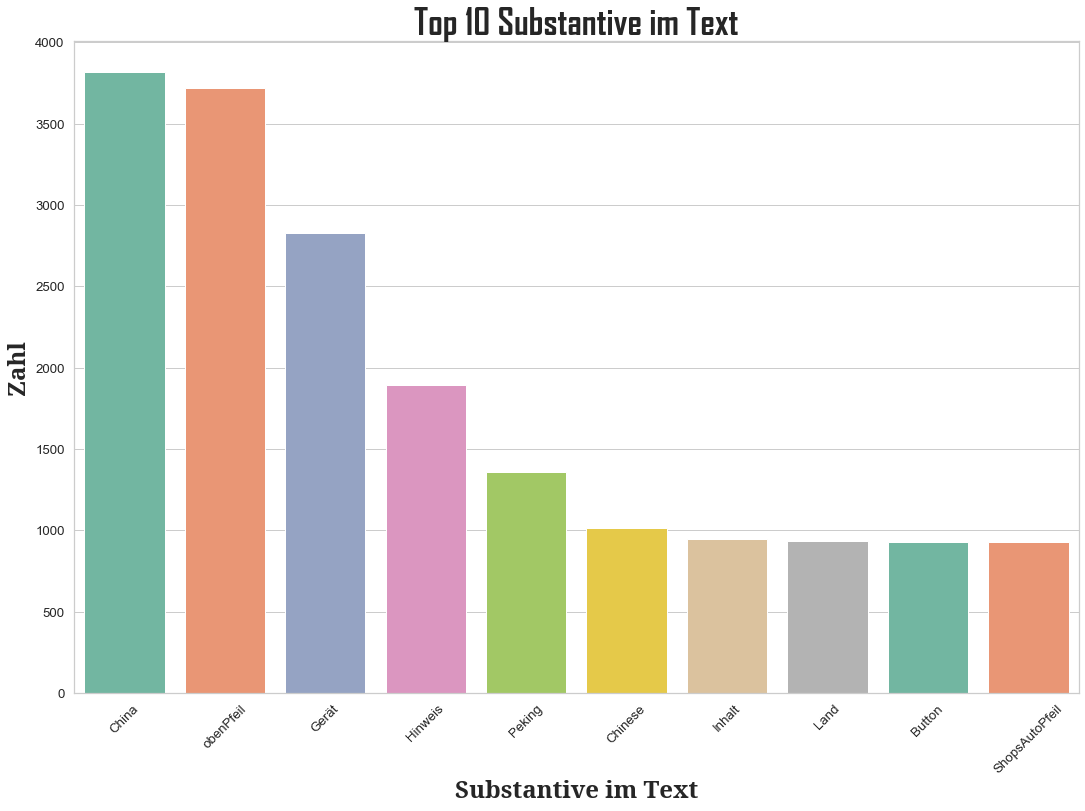

In [222]:
text_nouns_df = pd.DataFrame()
text_nouns_df['words'] = text_nouns

plt.figure(figsize = (18,12))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "words" , data = text_nouns_df, order = list(text_nouns_df['words'].value_counts().index[0:10]), palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_ylabel("Zahl", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_xlabel("Substantive im Text", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_title("Top 10 Substantive im Text", fontsize = 36, fontweight = 'bold',fontfamily = 'Agency FB')

In [237]:
my_dict = {'1947 - 1960':0, '1961 - 1970': 0, '1971 - 1980': 0, '1981 - 1990': 0, '1991 - 2000': 0, '2001 - 2010': 0, '2011 - 2020': 0}

In [238]:
for i in f['Erscheinungsdatum']:
    year = int(i[-4:])
    if year <= 1960:
        my_dict['1947 - 1960'] += 1
    elif year <= 1970:
        my_dict['1961 - 1970'] += 1
    elif year <= 1980:
        my_dict['1971 - 1980'] += 1
    elif year <= 1990:
        my_dict['1981 - 1990'] += 1
    elif year <= 2000:
        my_dict['1991 - 2000'] += 1
    elif year <= 2010:
        my_dict['2001 - 2010'] += 1
    elif year <= 2020:
        my_dict['2011 - 2020'] += 1

In [266]:
my_dict

{'1947 - 1960': 13,
 '1961 - 1970': 47,
 '1971 - 1980': 208,
 '1981 - 1990': 154,
 '1991 - 2000': 128,
 '2001 - 2010': 241,
 '2011 - 2020': 234}

In [395]:
cnt_df = pd.DataFrame()
cnt_df['decade'] = ''
cnt_df['count'] = 0
i = 0
for m in my_dict.keys():
    cnt_df.loc[i] = [str(m), int(my_dict[str(m)])]
    i+=1
cnt_df

decade  count
0  1947 - 1960     13
1  1961 - 1970     47
2  1971 - 1980    208
3  1981 - 1990    154
4  1991 - 2000    128
5  2001 - 2010    241
6  2011 - 2020    234

Text(0.5, 1.0, 'Zahl der Artikel pro Dekade')

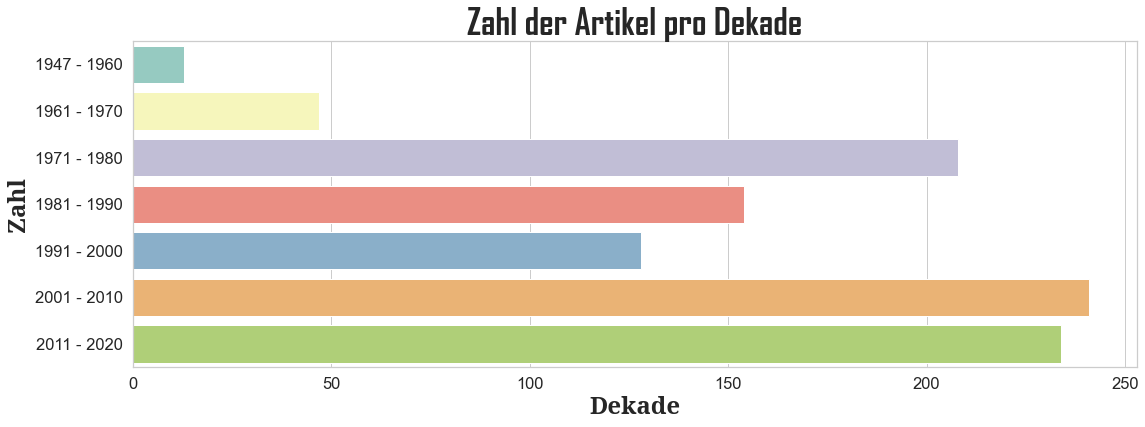

In [498]:
#print(cnt_df['decade'])
plt.figure(figsize = (18,6))
sns.set(style = "whitegrid",font_scale = 1.5)
chart = sns.barplot(y = 'decade', x = 'count', data = cnt_df, orient='h', palette='Set3')
#chart.set_xticklabels(chart.get_xticklabels())
chart.set_ylabel("Zahl", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_xlabel("Dekade", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_title("Zahl der Artikel pro Dekade", fontsize = 36, fontweight = 'bold',fontfamily = 'Agency FB')

In [364]:
cnt_dict = dict()

In [365]:
for i in f['Erscheinungsdatum']:
    year = str(i[-4:])
    if year in cnt_dict:
        cnt_dict[year] += 1
    else:
        cnt_dict[year] = 1
cnt_dict

{'2020': 35,
 '2019': 32,
 '2018': 25,
 '2017': 18,
 '2016': 21,
 '2015': 15,
 '2014': 19,
 '2013': 19,
 '2012': 21,
 '2011': 29,
 '2010': 26,
 '2009': 22,
 '2008': 41,
 '2007': 38,
 '2006': 19,
 '2005': 29,
 '2004': 28,
 '2003': 12,
 '2002': 13,
 '2001': 13,
 '2000': 17,
 '1999': 15,
 '1998': 12,
 '1997': 15,
 '1996': 9,
 '1995': 16,
 '1994': 9,
 '1993': 18,
 '1992': 9,
 '1991': 8,
 '1990': 7,
 '1989': 24,
 '1988': 12,
 '1987': 19,
 '1986': 12,
 '1985': 21,
 '1984': 15,
 '1983': 10,
 '1982': 18,
 '1981': 16,
 '1980': 26,
 '1979': 25,
 '1978': 31,
 '1977': 15,
 '1976': 19,
 '1975': 17,
 '1974': 12,
 '1973': 13,
 '1972': 19,
 '1971': 31,
 '1970': 8,
 '1969': 7,
 '1968': 1,
 '1967': 8,
 '1966': 2,
 '1965': 5,
 '1964': 10,
 '1963': 2,
 '1962': 3,
 '1961': 1,
 '1960': 1,
 '1959': 4,
 '1957': 4,
 '1956': 2,
 '1954': 1,
 '1948': 1}

In [453]:
year_df = pd.DataFrame()
year_df['year'] = ''
year_df['count'] = 0
j = 0
for i in range(1948, 2021):
    if str(i) in cnt_dict:
        year_df.loc[j] = [str(i), int(cnt_dict[str(i)])]
    else:
        year_df.loc[j] = [str(i), 0]
    j+=1
year_df

year  count
0   1948      1
1   1949      0
2   1950      0
3   1951      0
4   1952      0
5   1953      0
6   1954      1
7   1955      0
8   1956      2
9   1957      4
10  1958      0
11  1959      4
12  1960      1
13  1961      1
14  1962      3
15  1963      2
16  1964     10
17  1965      5
18  1966      2
19  1967      8
20  1968      1
21  1969      7
22  1970      8
23  1971     31
24  1972     19
25  1973     13
26  1974     12
27  1975     17
28  1976     19
29  1977     15
..   ...    ...
43  1991      8
44  1992      9
45  1993     18
46  1994      9
47  1995     16
48  1996      9
49  1997     15
50  1998     12
51  1999     15
52  2000     17
53  2001     13
54  2002     13
55  2003     12
56  2004     28
57  2005     29
58  2006     19
59  2007     38
60  2008     41
61  2009     22
62  2010     26
63  2011     29
64  2012     21
65  2013     19
66  2014     19
67  2015     15
68  2016     21
69  2017     18
70  2018     25
71  2019     32
72  2020     35

[73 rows x 2 columns]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


Text(0.5, 1.0, 'Zahl der Artikel pro Jahr')

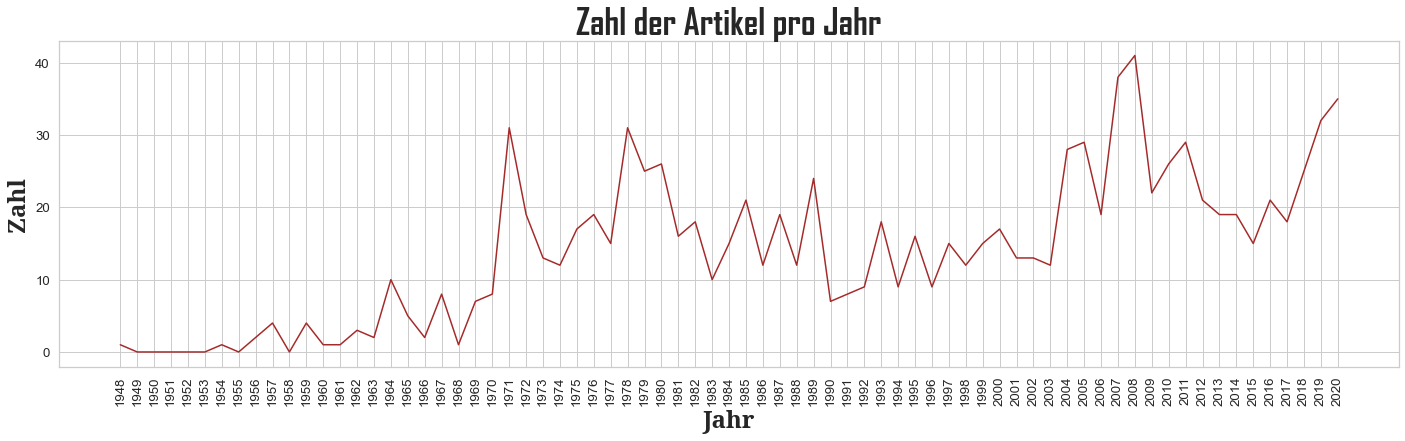

In [466]:
plt.figure(figsize = (24,6))
sns.set(style = "whitegrid",font_scale = 1.2)
#sns.set_context("talk", rc={'line.linewidth':10.5})
chart = sns.lineplot(x = 'year', y = 'count', data = year_df, color = 'brown')
chart.set_xticklabels(year_df['year'],rotation=90)
chart.set_ylabel("Zahl", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_xlabel("Jahr", fontsize = 24, fontweight = 'bold', fontfamily = 'Noto Serif')
chart.set_title("Zahl der Artikel pro Jahr", fontsize = 36, fontweight = 'bold',fontfamily = 'Agency FB')